# Analysis to find the best markets.
- This analysis is focused on finding which countries are the best countries to invest on marketing
- What are the targeted groups should the advertisement be focused on


### Analysis Outline
1. Import all the libraries we need to do the analysis
2. Load the data set
3. Review the dataset and look for interesting parts
4. filter the dataset to remain with the few needed columns

In [96]:
import pandas as pd
import matplotlib.pyplot as plt

In [86]:
new_coders = pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv')

C:\Users\fidele\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (17,62) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [88]:

new_coders

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
3,26.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,20.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18170,41.0,0.0,NaN,NaN,NaN,NaN,1.0,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,never see,NaN,NaN
18171,31.0,0.0,NaN,NaN,NaN,NaN,1.0,more than 1 million,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18172,39.0,0.0,NaN,NaN,NaN,NaN,3.0,more than 1 million,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
18173,54.0,0.0,NaN,NaN,NaN,NaN,3.0,"between 100,000 and 1 million",NaN,NaN,...,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN


In [115]:
cleaned_data = new_coders[new_coders['MonthsProgramming'] != 0]
cleaned_data = cleaned_data[cleaned_data['CountryLive'].notna()]
cleaned_data = cleaned_data[cleaned_data['CountryLive'].notna()]
cleaned_data = cleaned_data[cleaned_data['MoneyForLearning'] != 0]
cleaned_data = cleaned_data[cleaned_data['MoneyForLearning'].notna()]

In [116]:
cleaned_data['MoneyForLearning'].unique()

array([1.5000e+02, 8.0000e+01, 1.0000e+03, 2.0000e+02, 7.0000e+02,
       1.0000e+02, 5.0000e+02, 4.0000e+03, 3.0000e+02, 1.0000e+04,
       5.0000e+03, 2.9000e+01, 6.0000e+02, 3.0000e+03, 1.4000e+04,
       4.0000e+02, 5.0000e+01, 2.0000e+01, 9.6000e+03, 1.8000e+03,
       2.0000e+03, 2.5000e+01, 5.0000e+00, 8.5000e+02, 4.5000e+02,
       2.5000e+02, 3.0000e+00, 3.8000e+01, 3.0000e+01, 1.2000e+02,
       1.0000e+01, 8.0000e+02, 3.5000e+02, 8.0000e+00, 2.5000e+03,
       4.0000e+01, 2.0000e+04, 3.7000e+03, 3.5000e+01, 2.4000e+02,
       6.0000e+01, 9.0000e+01, 8.0000e+03, 1.5000e+01, 1.6800e+04,
       1.2000e+04, 7.5000e+02, 2.3500e+02, 1.5000e+03, 6.0000e+03,
       1.4800e+04, 1.4000e+03, 1.3900e+04, 9.0000e+03, 3.3500e+02,
       4.5000e+01, 4.1000e+03, 1.6000e+04, 1.5000e+04, 9.0000e+02,
       5.4000e+03, 1.1000e+04, 3.6000e+01, 1.0700e+04, 1.8000e+04,
       1.3000e+04, 1.2500e+02, 7.2000e+02, 7.5000e+01, 2.3000e+02,
       1.1000e+03, 3.7500e+02, 3.5000e+03, 8.5000e+03, 2.2000e

In [117]:
cleaned_data['MoneyForLearning_monthly'] = cleaned_data['MoneyForLearning']/cleaned_data['MonthsProgramming']

In [118]:
pd.options.display.max_rows = 999
interesting_df = cleaned_data[['MoneyForLearning_monthly','CountryLive','MonthsProgramming']]
interesting_df

,MoneyForLearning_monthly,CountryLive,MonthsProgramming
0,25.000000,Canada,6.0
1,13.333333,United States of America,6.0
2,200.000000,United States of America,5.0
5,16.666667,Canada,12.0
8,24.137931,United States of America,29.0
...,...,...,...
18165,0.028571,Egypt,35.0
18169,21.428571,Belarus,7.0
18170,10.000000,Indonesia,1.0
18171,10000.000000,Nigeria,1.0


In [119]:
pd.options.display.max_rows = 999
interesting_df.groupby('CountryLive', as_index=False).agg({'MoneyForLearning_monthly': "mean"}).sort_values(by='MoneyForLearning_monthly',ascending=False)

,CountryLive,MoneyForLearning_monthly
144,Yemen,10000.000000
64,Jamaica,1347.444444
77,Malawi,757.166667
122,Spain,728.957007
7,Austria,635.827444
54,Hong Kong,589.765421
93,New Zealand,522.355682
106,Portugal,459.470274
74,Luxembourg,377.238248
138,United States of America,357.309306


TypeError: unsupported operand type(s) for /: 'str' and 'int'

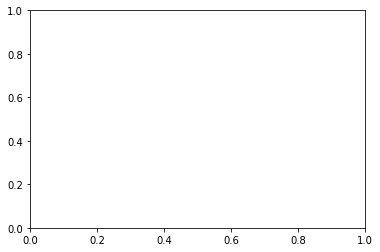

In [123]:

cleaned_data.boxplot(by='MoneyForLearning_monthly',column=['CountryLive'])

In [76]:
new_coders['MonthsProgramming'][new_coders['CountryLive'] == 'Yemen']

3994    1.0
6452    6.0
Name: MonthsProgramming, dtype: float64

TypeError: nan is not a string

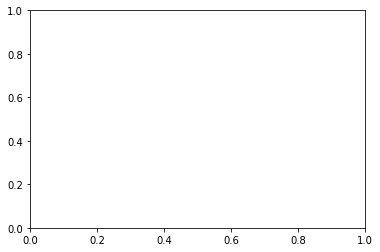

In [97]:
plt.barh(cleaned_data['CountryLive'],cleaned_data['MoneyForLearning_monthly'])
plt.show()